Dummy Smith Waterman

In [2]:
import pandas as pd
import time
import numpy as np
from datetime import datetime as dt

In [5]:
# -*- coding: utf-8 -*-

"""

LIFE97011 - Computing
Python Programming - Assessed Exercise No. 3
Task: Smith Waterman local alignment
@Author: Slaviana Pavlovich

"""

# Importing Python packages
from enum import IntEnum
import numpy as np

# Assigning the constants for the scores
class Score(IntEnum):
    MATCH = 15
    CONS_GAP = -1  # Want to penalize worst a first gap than a secong gap
    FIRST_GAP = -4
    MISMATCH = -3
    DUP = 0

# Assigning the constant values for the traceback
class Trace(IntEnum):
    STOP = 0
    LEFT = 1 
    UP = 2
    DIAGONAL = 3

# Reading the fasta file and keeping the formatted sequence's name and sequence
'''
def fasta_reader(sequence_file):
    lines = open(sequence_file).readlines()
    sequence_name_row = lines[0][1:]
    sequence = lines[1]
    return sequence_name_row.replace(" ", "").strip(), sequence.strip()
'''

# Implementing the Smith Waterman local alignment
def smith_waterman(seq1, seq2):
    # Generating the empty matrices for storing scores and tracing
    row = len(seq1) + 1
    col = len(seq2) + 1

    matrix = [[]]
    tracing_matrix = [[]]

    matrix = np.zeros(shape=(row, col), dtype=np.int64)  
    tracing_matrix = np.zeros(shape=(row, col), dtype=np.int64) 
    
    # Initialising the variables to find the highest scoring cell
    max_score = -1
    max_index = (-1, -1)
    
    # Calculating the scores for all cells in the matrix
    diagonal_score = 0  
    vertical_score = 0
    horizontal_score = 0
    
    for i in range(1, row):
        for j in range(1, col):
            # Calculating the diagonal score (match score)
            match_value = Score.MATCH if seq1[i - 1] == seq2[j - 1] else Score.MISMATCH
            diagonal_score = matrix[i - 1, j - 1] + match_value
            
            if seq2[j-1] == seq2[j-2]:
                vertical_score = matrix[i - 1, j] + Score.DUP
            elif matrix[i - 1, j] == vertical_score:
                vertical_score = matrix[i - 1, j] + Score.CONS_GAP
            else: 
                vertical_score = matrix[i - 1, j] + Score.FIRST_GAP
            
            # Calculating the vertical gap score, penalizing consecutive gaps
            if seq1[i-1] == seq1[i-2]:
                horizontal_score = matrix[i, j - 1] + Score.DUP
            elif matrix[i, j - 1] == horizontal_score:
                horizontal_score = matrix[i, j - 1] + Score.CONS_GAP
            else: 
                horizontal_score = matrix[i, j - 1] + Score.FIRST_GAP

            
            # Taking the highest score 
            matrix[i, j] = max(0, diagonal_score, vertical_score, horizontal_score)
            
            # Tracking where the cell's value is coming from    
            if matrix[i, j] == 0: 
                tracing_matrix[i, j] = Trace.STOP
                
            elif matrix[i, j] == horizontal_score: 
                tracing_matrix[i, j] = Trace.LEFT
                
            elif matrix[i, j] == vertical_score: 
                tracing_matrix[i, j] = Trace.UP
                
            elif matrix[i, j] == diagonal_score: 
                tracing_matrix[i, j] = Trace.DIAGONAL 
                
            # Tracking the cell with the maximum score
            if matrix[i, j] >= max_score:
                max_index = (i,j)
                max_score = matrix[i, j]
    
    # Initialising the variables for tracing
    aligned_seq1 = [ ] #""
    aligned_seq2 = [ ] #""   
    current_aligned_seq1 = [ ] #""   
    current_aligned_seq2 = [ ] #""  
    (max_i, max_j) = max_index
    
    # Tracing and computing the pathway with the local alignment
    while tracing_matrix[max_i, max_j] != Trace.STOP:
        if tracing_matrix[max_i, max_j] == Trace.DIAGONAL:
            current_aligned_seq1.append(seq1[max_i - 1])
            current_aligned_seq2.append(seq2[max_j - 1])
            max_i = max_i - 1
            max_j = max_j - 1
            
        elif tracing_matrix[max_i, max_j] == Trace.UP:
            current_aligned_seq1.append(seq1[max_i - 1])
            current_aligned_seq2.append('-')
            max_i = max_i - 1    
            
        elif tracing_matrix[max_i, max_j] == Trace.LEFT:
            current_aligned_seq1.append('-')
            current_aligned_seq2.append(seq2[max_j - 1])
            max_j = max_j - 1
            
        #aligned_seq1 = aligned_seq1 + current_aligned_seq1
        #aligned_seq2 = aligned_seq2 + current_aligned_seq2
    
    # Reversing the order of the sequences
    current_aligned_seq1 = current_aligned_seq1[::-1]
    current_aligned_seq2 = current_aligned_seq2[::-1]
    
    return current_aligned_seq1, current_aligned_seq2, max_score, max_index, max_i, max_j, matrix, tracing_matrix, diagonal_score

In [9]:
seq_1 = ['A', 'B', 'E', 'C', 'D', 'A', 'B', 'C']  #['A', 'C', 'G', 'G', 'G', 'C', 'T', 'C']   #['A', 'B', 'E', 'C', 'D', 'A', 'B', 'C'] #['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Z', 'Y', 'H', 'I', 'J']  #.array
file_1_name = 'start'
seq_2 = ['A', 'B', 'A', 'D', 'C', 'E', 'B', 'C']  #['A', 'T', 'G', 'C', 'C', 'T', 'C']     #['A', 'B', 'A', 'D', 'C', 'E', 'B', 'C']#['Z', 'Y', 'X', 'F', 'E', 'D', 'A', 'F', 'H', 'I', 'T']    #.array
file_2_name = 'end'

aligned_seq_1 = []
aligned_seq_2 = []
index_seq1 = []
index_seq2 = []
matrix = [[]]
tracing_matrix = [[]]
diagonal_score = [[]]

# Executing the Smith Waterman local alignment algorithm
aligned_seq_1, aligned_seq_2, max_score, max_index, max_i, max_j, matrix, tracing_matrix, diagonal_score = smith_waterman(seq_1, seq_2)


trans_aligned_seq_1 = []
trans_aligned_seq_2 = []
trans_index_seq1 = []
trans_index_seq2 = []
trans_matrix = [[]]
trans_tracing_matrix = [[]]

trans_aligned_seq_1, trans_aligned_seq_2, trans_max_score, trans_max_index, trans_max_i, trans_max_j, trans_matrix, trans_tracing_matrix, trans_diagonal_score = smith_waterman(file_1[::-1], file_2)


In [10]:
# Original sequences
print(seq_1, "\n",
      seq_2)

['A', 'B', 'E', 'C', 'D', 'A', 'B', 'C'] 
 ['A', 'B', 'A', 'D', 'C', 'E', 'B', 'C']


In [11]:
# Aligned sequences
print(aligned_seq_1, "\n",
 aligned_seq_2)

['A', 'B', '-', '-', 'E', 'C', 'D', 'A', 'B', 'C'] 
 ['A', 'B', 'A', 'D', '-', 'C', 'E', '-', 'B', 'C']


In [16]:
file_1[::-1]

['C', 'T', 'C', 'G', 'G', 'G', 'C', 'A']

In [17]:
print(trans_aligned_seq_1, "\n"
, trans_aligned_seq_2)

['C', 'T', 'C'] 
 ['C', 'T', 'C']


Ivan: 
Do we want to consider transposition with gaps? 
1st identical and then look at transpositions without identical parts? -> No parallelize
Pioritize between matches, gaps, transpositions,...

Next step: how we merge both results?

In [18]:
matrix

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 15, 11, 10,  9,  8,  7,  6],
       [ 0, 11, 12,  9, 25, 24, 20, 22],
       [ 0,  7,  8, 27, 23, 24, 21, 18],
       [ 0,  3,  4, 23, 24, 24, 24, 24],
       [ 0,  0,  0, 19, 20, 24, 24, 24],
       [ 0,  0,  0, 15, 34, 35, 31, 39],
       [ 0,  0, 15, 11, 30, 35, 50, 46],
       [ 0,  0, 11, 12, 26, 45, 46, 65]], dtype=int64)

In [19]:
tracing_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 1, 1, 1, 1, 1, 1],
       [0, 2, 3, 2, 3, 3, 1, 3],
       [0, 2, 2, 3, 1, 2, 3, 2],
       [0, 2, 2, 2, 3, 1, 1, 1],
       [0, 0, 0, 2, 2, 2, 1, 1],
       [0, 0, 0, 2, 3, 3, 1, 3],
       [0, 0, 3, 1, 2, 2, 3, 1],
       [0, 0, 2, 3, 2, 3, 2, 3]], dtype=int64)

max-pooling: sometimes returns not local-max, we would have to detect them, once applied

In [20]:
import torch

filter = torch.nn.MaxPool2d(kernel_size=3, stride=3, return_indices=True)
unpool = torch.nn.MaxUnpool2d(3, stride=3)
input = torch.tensor(matrix.astype(float)).unsqueeze(0)
output, indices = filter(input)
unpool(output, indices, output_size = np.shape(matrix))

tensor([[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0., 15.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0., 25.,  0.,  0.,  0.],
         [ 0.,  0.,  8., 27.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0., 15.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0., 45.,  0.,  0.]]], dtype=torch.float64)

Check the greatest values than the Score.MATCH, so we can check if they belong to the already alingment sequence or not

In [21]:
tracing_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 1, 1, 1, 1, 1, 1],
       [0, 2, 3, 2, 3, 3, 1, 3],
       [0, 2, 2, 3, 1, 2, 3, 2],
       [0, 2, 2, 2, 3, 1, 1, 1],
       [0, 0, 0, 2, 2, 2, 1, 1],
       [0, 0, 0, 2, 3, 3, 1, 3],
       [0, 0, 3, 1, 2, 2, 3, 1],
       [0, 0, 2, 3, 2, 3, 2, 3]], dtype=int64)

<AxesSubplot:>

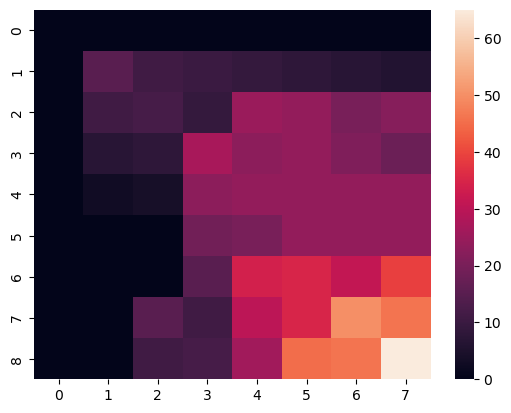

In [22]:
import seaborn as sns
sns.heatmap(matrix)

In [23]:
matrix

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 15, 11, 10,  9,  8,  7,  6],
       [ 0, 11, 12,  9, 25, 24, 20, 22],
       [ 0,  7,  8, 27, 23, 24, 21, 18],
       [ 0,  3,  4, 23, 24, 24, 24, 24],
       [ 0,  0,  0, 19, 20, 24, 24, 24],
       [ 0,  0,  0, 15, 34, 35, 31, 39],
       [ 0,  0, 15, 11, 30, 35, 50, 46],
       [ 0,  0, 11, 12, 26, 45, 46, 65]], dtype=int64)

In [24]:
tracing_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 1, 1, 1, 1, 1, 1],
       [0, 2, 3, 2, 3, 3, 1, 3],
       [0, 2, 2, 3, 1, 2, 3, 2],
       [0, 2, 2, 2, 3, 1, 1, 1],
       [0, 0, 0, 2, 2, 2, 1, 1],
       [0, 0, 0, 2, 3, 3, 1, 3],
       [0, 0, 3, 1, 2, 2, 3, 1],
       [0, 0, 2, 3, 2, 3, 2, 3]], dtype=int64)

In [25]:
from scipy.ndimage import maximum_filter

'''maximum_filter(matrix, 
                 size = None, 
                 footprint = None, 
                 output = None, 
                 mode = 'reflect', 
                 cval = 0.0, 
                 origin = 0)'''

max = (matrix == maximum_filter(matrix, 3, mode = 'constant', cval = 0))

res = np.where(1== max)
print(res)

(array([1, 2, 3, 4, 4, 4, 6, 7, 7, 8, 8], dtype=int64), array([1, 7, 3, 5, 6, 7, 0, 0, 2, 0, 7], dtype=int64))


In [26]:
np.shape(matrix)

(9, 8)

In [27]:
import numpy as np
from scipy.ndimage import minimum_filter


data = np.array([[2, 100, 1000, -5],
        [-10, 9, 1800, 0],
        [112, 10, 111, 100],
        [50, 110, 50, 140]])


minima = (data == minimum_filter(data, 3, mode='constant', cval=0.0))
# print(data)
# print(minima)


res = np.where(1 == minima)
print(res)

(array([0, 1], dtype=int64), array([3, 0], dtype=int64))


In [28]:
import pandas as pd

def excel_reader(specie):
    data = pd.read_excel('../Data/Raw/Tables_Filtered_IK.xlsx', specie)
    
    data['Gene'] = data['Locus'].str.split('(\d+)').str[0] + data['Strand']
    data['Gene_non_or'] = data['Locus'].str.split('(\d+)').str[0]
    data.reset_index(inplace= True)

    data = data[data['Gene'].str.contains('LOC') == False]  

    return data

In [29]:
human = excel_reader('Human')